In [1]:
import IO, plotting as plotz, os
from numpy import *
from matplotlib.pyplot import *
import networkx as nx
import networkx as nx
from tqdm import tqdm_notebook as tqdm
%load_ext autoreload
%autoreload 2

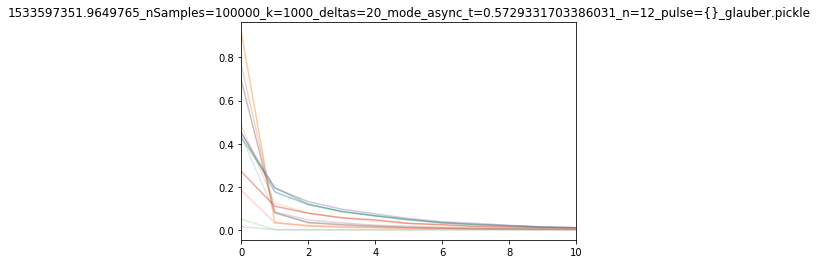

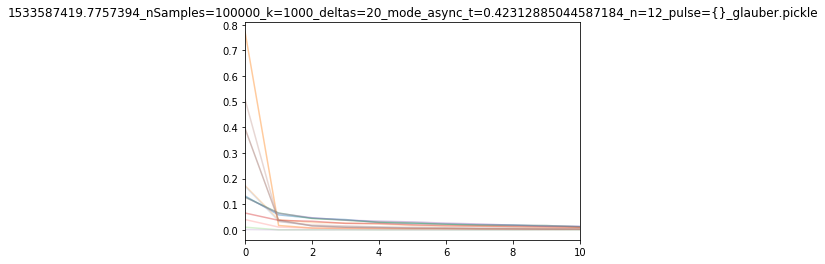

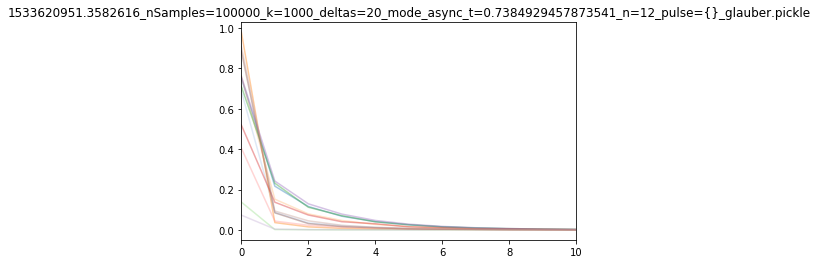

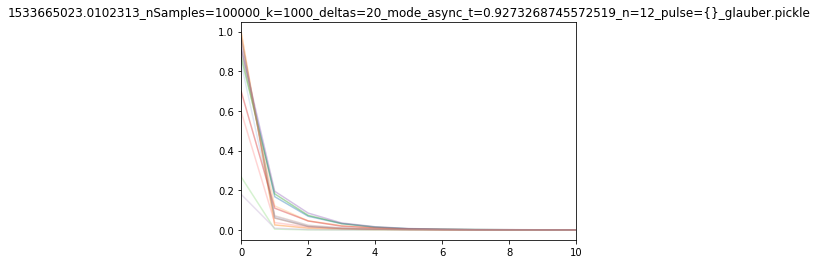

In [19]:
res = {}
d = f'{os.getcwd()}/Data/use'
d = f'{os.getcwd()}'
colors = cm.tab20(arange(12))
for file in os.listdir(d):
    if file.endswith('.pickle') and 'n=12' in file and '{}' in file:
        t = file
        res[t] = IO.loadPickle(f'{d}/{file}')
        fig, ax = subplots();
        [ax.plot(i, color = c, alpha = .4) for c, i in zip(colors, res[t]['mi'].T)]
        degs = dict(nx.degree(res[t]['model'].graph)).values()
        ax.set_title(file)
#         fig, ax = subplots()
        degs = dict(nx.degree(res[t]['model'].graph))
#         ax.hist(degs.values())
#         ax.set_yscale('log')
        ax.set_xlim(0, 10)
show()


{'depr': 9, 'effort': 8, 'sleep': 4, 'happy': 5, 'lonely': 7, 'unfr': 1, 'enjoy': 5, 'appet': 7, 'sad': 7, 'dislike': 4, 'getgo': 6, 'loss': 3}


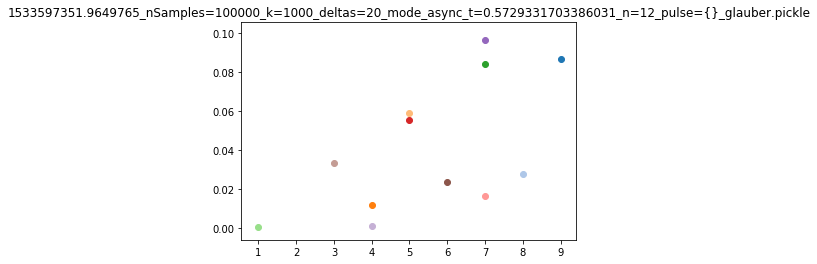

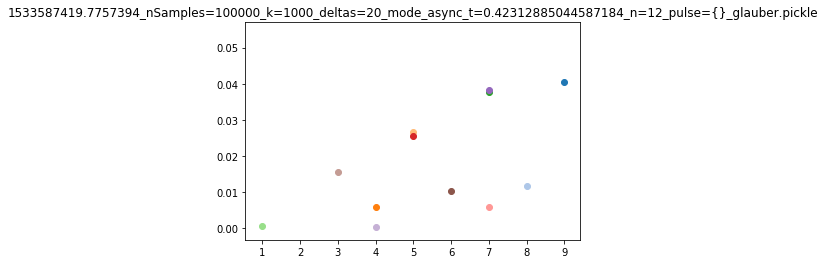

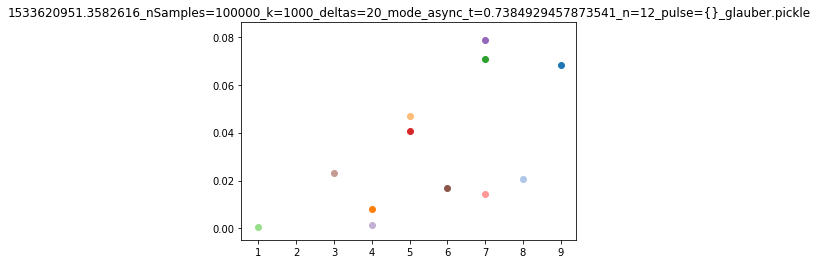

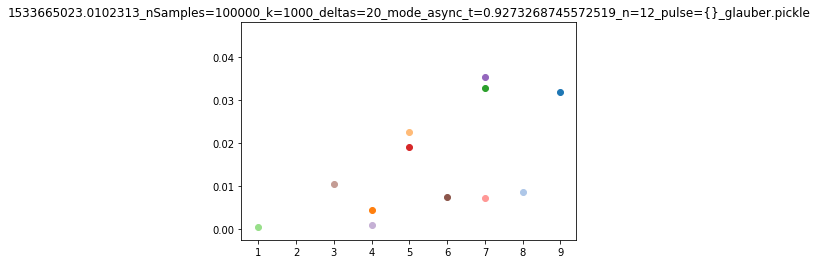

In [20]:
for key, value in tqdm( res.items () ):
    fig, ax = subplots()
    mi = value['mi']
    degs = dict ( nx.degree(value['model'].graph) )
    for n, d in degs.items():
        idx = value['model'].mapping[n]
        ax.scatter(d, mi[3, idx], color = colors[idx])
        
        ax.set_title(key)
# ax.set_xscale('log')

print(degs)
show()

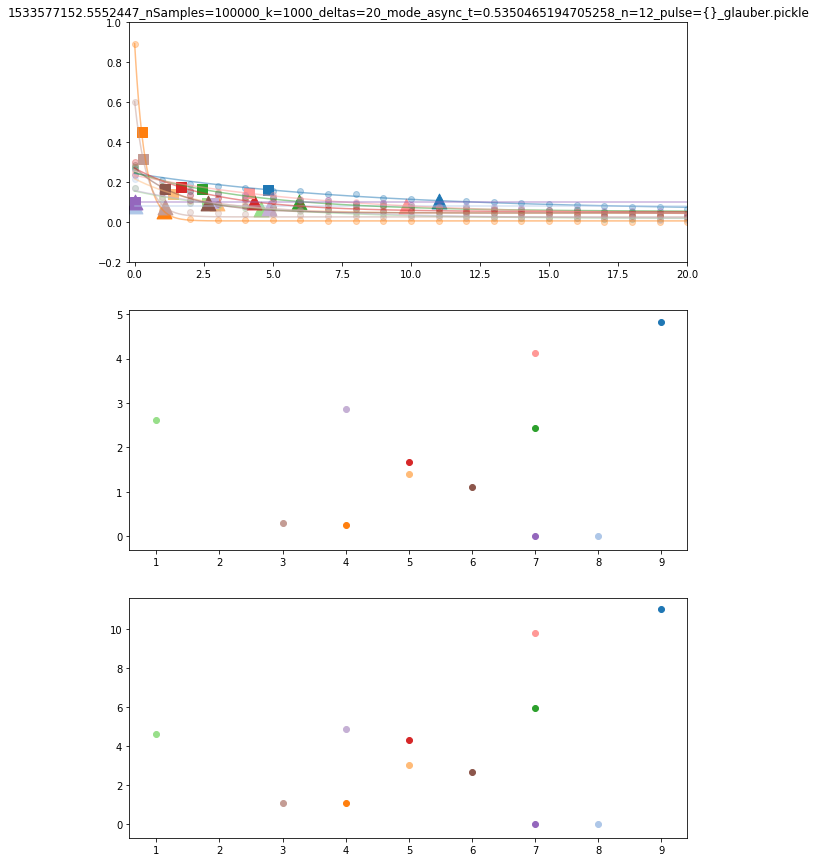

In [11]:
import scipy
from sklearn.gaussian_process import GaussianProcessRegressor as gp
# print( scipy.optimize.show_options())

xx = linspace(0, 400, 10000)
w  = None
# w  = 'weight'

func = lambda x, a, b, c, d, e, f, g:  a + b * exp(-c * (x - f))#  + d * exp(-e * (x )) # + e * exp(- f * x)
%matplotlib inline


g = gp(normalize_y = True)
for k, v in res.items():
    mi = v['mi']
    model = v['model']
    errors = zeros((model.nNodes))
    ii = zeros((model.nNodes, 2))
    HH = zeros((len(xx), model.nNodes))
    x = arange(len(mi))
    model = v['model']
    fig, ax = subplots(3, figsize = (10, 15))
    for idx, i in enumerate( tqdm( mi.T) ):
#         fig, ax = subplots(3)
        a, b = scipy.optimize.curve_fit(func, x, i, maxfev = 2000, method = 'trf')
        f = lambda x, c: func(x, *a) - c
        
#         g.fit(x[:, None], i)
        tmp = a[0] + (max(i) - a[0]) / 2
        tmp2= a[0] + .05
        
        
        r   = scipy.optimize.root(f, 0, args = (tmp))
        rr  = scipy.optimize.root(f, 0, args = (tmp2))
        if i[0] == 0:
            r.x = 0
            rr.x = 0
        ii[idx, :] = r.x, rr.x
        HH[:, idx] = func(xx, *a)
        error = sqrt((func(x, *a) - i)**2).sum()
        errors[idx] = error
        
#         ax[0].plot(xx, g.predict(xx[:, None]))
        
        ax[0].plot(xx, func(xx, *a), alpha = .5, color = colors[idx] )
        ax[0].scatter(x, i, alpha = .3, color = colors[idx] )
        ax[0].scatter(r.x, func(r.x, *a), s = 120, marker = 's', color = colors[idx] ) 
        ax[0].scatter(rr.x, func(rr.x, *a), s = 220, marker = '^', color = colors[idx] )
        for axi, j in zip(ax[1:], ii[idx]):
            node = model.rmapping[idx]
            d = model.graph.degree(node, weight = w)
            axi.scatter(d,  j, color = colors[idx])
#             axi.set_yscale('log')
                
        ax[0].set_xlim(-.2, 20)
        ax[0].set_ylim(-.2, 1)
    ax[0].set_title(k)
show()

/home/casper/miniconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


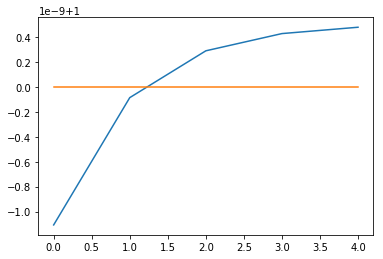

In [270]:
x = arange(5)
y = ones(x.size)
func = lambda x, a, b, c: a + b *exp(-c*x)
a, b = scipy.optimize.curve_fit(func, x, y)

plot(x, func(x, *a), x,y)

[0. 0. 0. 0. 0. 0. 0. 0.]


/home/casper/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


(array([ 0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

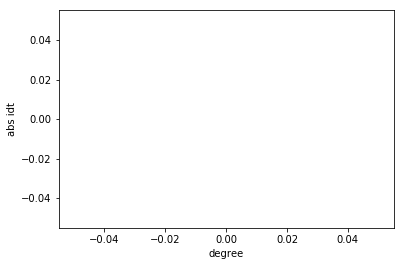

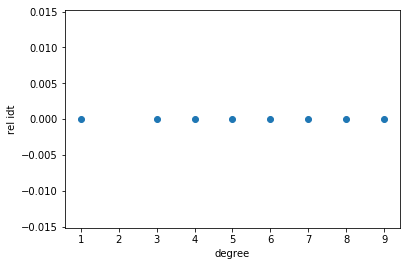

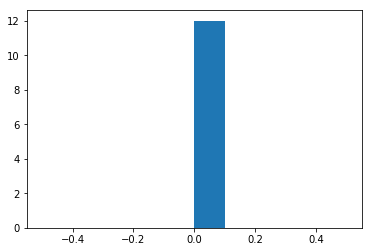

In [9]:

degs = dict(nx.degree(model.graph))
idt_deg = {}
idt_norm = {}
idt_rel  = {}
idt_rel_n= {}
for node, deg in degs.items():
    idx = model.mapping[node]
    idt_deg[deg] = idt_deg.get(deg, 0) + ii[idx, 0]
    idt_norm[deg] = idt_norm.get(deg, 0) + 1
    
    idt_rel_n[deg] = idt_rel.get(deg, 0) + 1
    idt_rel[deg] = idt_rel.get(deg, 0) + ii[idx, 1]

idts = {}
for k, v in idt_deg.items():
    idts[k] = v / idt_norm[k]
for k, v in idt_rel.items():
    idt_rel[k] = v / idt_rel_n[k]

#     ax.scatter(deg, ii[idx, 1])
fig, ax = subplots();
ax.scatter(list(idts.keys()), log(list(idts.values())))
setp(ax, **dict(xlabel = 'degree', ylabel = 'abs idt'))
fig, ax = subplots()
ax.scatter(list(idt_rel.keys()), list(idt_rel.values()))
print(sort(list(idts.values())))
setp(ax, **dict(xlabel = 'degree', ylabel = 'rel idt'))

ii[ii <0]= 0
# ax.set_yscale('log')
# ax.set_xlim(0, 30)
# ax.set_xscale('log')
fig, ax = subplots()
ax.hist(ii[:, 1])
# ax.set_yscale('log')


In [7]:
for k, v in joint.items():
    print(k,v)

(-1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1) [[[1.    0.   ]
  [1.    0.   ]
  [0.    1.   ]
  ...
  [1.    0.   ]
  [1.    0.   ]
  [1.    0.   ]]

 [[0.994 0.006]
  [1.    0.   ]
  [0.839 0.161]
  ...
  [0.966 0.034]
  [0.953 0.047]
  [0.883 0.117]]

 [[0.997 0.003]
  [0.972 0.028]
  [0.836 0.164]
  ...
  [0.934 0.066]
  [0.962 0.038]
  [0.888 0.112]]

 ...

 [[0.554 0.446]
  [0.549 0.451]
  [0.544 0.456]
  ...
  [0.543 0.457]
  [0.547 0.453]
  [0.545 0.455]]

 [[0.55  0.45 ]
  [0.554 0.446]
  [0.525 0.475]
  ...
  [0.537 0.463]
  [0.549 0.451]
  [0.554 0.446]]

 [[0.553 0.447]
  [0.545 0.455]
  [0.533 0.467]
  ...
  [0.542 0.458]
  [0.544 0.456]
  [0.564 0.436]]]
(1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1) [[[0.00e+00 1.00e+00]
  [0.00e+00 1.00e+00]
  [0.00e+00 1.00e+00]
  ...
  [0.00e+00 1.00e+00]
  [0.00e+00 1.00e+00]
  [0.00e+00 1.00e+00]]

 [[4.00e-03 9.96e-01]
  [0.00e+00 1.00e+00]
  [1.45e-01 8.55e-01]
  ...
  [2.70e-02 9.73e-01]
  [3.70e-02 9.63e-01]
  [1.09e-01 8.91e-01]]

 [[1.